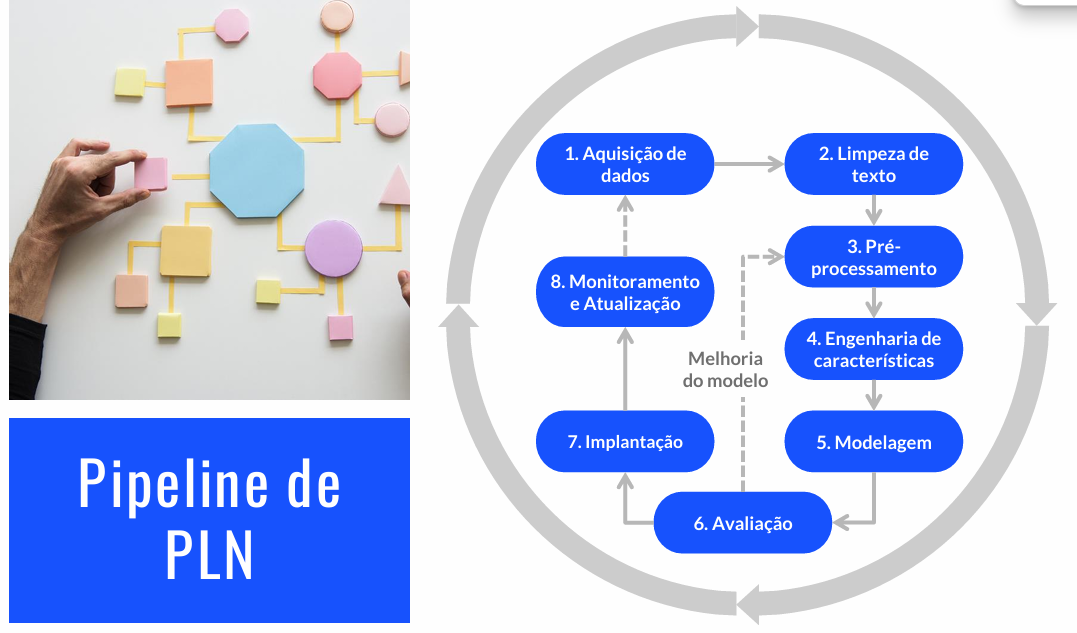

##  Introdução

1.1. Contextualização

1.2. O problema proposto

1.3. Objetivos

## 1. Aquisição dos Dados

Raspagem de Dado: Processo de coleta de dados estruturados da web de maneira automatizada


### 1.1 Raspagem dos comentários Tik Tok

In [ ]:
#Dados de comentários e respostas do TikTok
#Requisitos: requests, sqlite3

import requests
import sqlite3
import time

# --- CONFIGURAÇÕES INICIAIS ---
aweme_id = "7513969874524310790"
base_url = "https://www.tiktok.com/api/comment/list/"
reply_url = "https://www.tiktok.com/api/comment/list/reply/"

headers = {
    "User-Agent": "Mozilla/5.0",
    "Referer": "https://www.tiktok.com/",
    # "Cookie": "tt_webid=SEU_WEBID_AQUI; msToken=SEU_MSTOKEN_AQUI;"  # Substitua aqui!
    "Cookie": "ttwid=1%7CQr2ehPIOuy-E99mMdCVskboEKLQxvX-xPOSxKKUNh0Y%7C1741652843%7C683cb80e9f4a3d543b93f152e53cfa801ce153b3558b8e15a20d677923d00bc3; passport_csrf_token=889c288fc3e7cc4a6f7f21a04e23e012; passport_csrf_token_default=889c288fc3e7cc4a6f7f21a04e23e012; multi_sids=7516089968423945222%3Aabf9f6f9d33303d925b14d9f98b1d344; cmpl_token=AgQQAPNkF-RO0rhwaqaT-50__a4aUBrRP7XvYN6SSg; uid_tt=b3b0060def8d5c25a0215a66cf82f3ada8072d231c61ecc4fbd88ce174f6bdf3; uid_tt_ss=b3b0060def8d5c25a0215a66cf82f3ada8072d231c61ecc4fbd88ce174f6bdf3; sid_tt=abf9f6f9d33303d925b14d9f98b1d344; sessionid=abf9f6f9d33303d925b14d9f98b1d344; sessionid_ss=abf9f6f9d33303d925b14d9f98b1d344; store-idc=maliva; store-country-code=br; store-country-code-src=uid; tt-target-idc=useast1a; tt-target-idc-sign=k2brpYWDlp-ReyEvWq5jAsRYtfaUhIIM0lgPjYA0CqE_CVnPPgkYmqPffXMQbENeV0SHY5YK8geBr4qUaudeTlONF8NfxGj-Sw5urH5HdHNmE_b6weCUhuIIpWoXZd0NvvbIJi1VrxEP96Rx_KgYPrCTUMukKYO_XPVMWLtZKIS_-6eTPai8Fa2-R12ueYLkqKeof78CSppYMsiMfn_f9nA08BQLN27FujhXNVLjqOJRlgaEUq4D1Ke_HS3LtSz8g68oMnoxz6XVWN-1lsOhr5aFQf45quVtZnq1EmkyjKx0X0cjtVXYIJRFe5KCtBQ9T5a2ycW7CPQfqeDk4WUOBmbmsm2SYjQPuTzYs2fE_2L96zliRGwQ3AFTiTnXIn7JUpmlM07-1MMapEvhi7gicDIDBh3itb2FI69M_Esh-B-a9-FMz7QZauypvpFJKBBmiB6qzwwqUv1SPG3826ZA5AGtwLpfC91sl10np-2-EQgwi6vxSYujSa6xGMKrtNw_; last_login_method=email; tt_chain_token=YOq7tYDnCj1wqddHJ4DF+Q==; delay_guest_mode_vid=8; sid_guard=abf9f6f9d33303d925b14d9f98b1d344%7C1749976265%7C15551983%7CFri%2C+12-Dec-2025+08%3A30%3A48+GMT; sid_ucp_v1=1.0.0-KDA0NDA0ZGEyNDQ4NTNkNGIxNDg4ZjMxMmU5MzQzYTExZGQ2YjgyYjAKGgiGiKXekYChp2gQyYm6wgYYsws4AUDrB0gEEAMaBm1hbGl2YSIgYWJmOWY2ZjlkMzMzMDNkOTI1YjE0ZDlmOThiMWQzNDQ; ssid_ucp_v1=1.0.0-KDA0NDA0ZGEyNDQ4NTNkNGIxNDg4ZjMxMmU5MzQzYTExZGQ2YjgyYjAKGgiGiKXekYChp2gQyYm6wgYYsws4AUDrB0gEEAMaBm1hbGl2YSIgYWJmOWY2ZjlkMzMzMDNkOTI1YjE0ZDlmOThiMWQzNDQ; __tea_cache_tokens_1988={%22web_id%22:%221394814550531564812%22%2C%22user_unique_id%22:%221394814550531564812%22%2C%22timestamp%22:1749976494174%2C%22_type_%22:%22default%22}; tt_csrf_token=UTEtMIxh-FWEGTTjnul6PCF4qlmtZVvu3fls; tiktok_webapp_theme_source=auto; tiktok_webapp_theme=dark; perf_feed_cache={%22expireTimestamp%22:1750140000000%2C%22itemIds%22:[%227501277196305059078%22%2C%227503332283789708550%22%2C%227501392629708492037%22]}; store-country-sign=MEIEDFLJNI8bVJ_qWaHYrwQgWz8nhycQNRhx40jjMZRVwgAkfMPeNu0O40uFCP9xd4gEEG_1HFhxfdeVF2_CkVEJsZk; msToken=D0LOdwgXHZvtWzWYFkzy0Pnr9gDlig8n1cWUwXAc_ZvcON6F2ACZLtrt7Df-Bd-vTRhE45WG2RIMWZkAOlolhp0ysdXbx3iwL4MEeoilMIA3tlt7eTmWGicB2INDd7N3uh7Ac8Z3BoTjWrYi24JF69B3pfs=; passport_fe_beating_status=true; msToken=KSND9TrRJxL3t2Z7gqkf8IXwjaEkeF06Px93rVVkiWI99autG8Oz0T8AKSSBkS7VO6cCk1pZKnAN4CVeWuw_lUCmMt4grO_Sh_352s8V9SVIXePdIK3oi1xi9J0tqRLSZ3rnYQ7NpwMzFWUWnVINQ6YIGZU=; odin_tt=411d6e2dc87684bd6a7d67ea67d3d3246853e6fe058f4ad43a67dee72f0c2780934b0f9f825d3d78674de66393663f515275f6ff64f9ab223569a7d4f25eda20"  # Pegue do navegador!
}

params_base = {
    "aid": "1988",
    "app_language": "en",
    "app_name": "tiktok_web",
    "aweme_id": aweme_id,
    "count": 50,
    "cursor": 0
}

# --- CRIAÇÃO DO BANCO DE DADOS ---
conn = sqlite3.connect("replais_comentarios_tiktok.db")
cur = conn.cursor()
cur.execute("""
    CREATE TABLE IF NOT EXISTS comentarios (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        comment_id TEXT,
        parent_id TEXT,
        nickname TEXT,
        text TEXT,
        create_time INTEGER
    )
""")

# --- FUNÇÃO PARA SALVAR NO BANCO ---
def salvar_comentario(comment_id, parent_id, nickname, text, create_time):
    cur.execute("""
        INSERT INTO comentarios (comment_id, parent_id, nickname, text, create_time)
        VALUES (?, ?, ?, ?, ?)
    """, (comment_id, parent_id, nickname, text, create_time))
    conn.commit()

# --- FUNÇÃO PARA OBTER RESPOSTAS ---
def pegar_replies(comment_id):
    reply_params = {
        "aid": "1988",
        "app_language": "en",
        "app_name": "tiktok_web",
        "aweme_id": aweme_id,
        "count": 50,
        "cursor": 0,
        "comment_id": comment_id
    }

    while True:
        r = requests.get(reply_url, headers=headers, params=reply_params)
        if r.status_code != 200:
            break
        reply_data = r.json()
        replies = reply_data.get("comments", [])
        if not replies:
            break

        for reply in replies:
            if not reply.get("user") or not reply["user"].get("nickname"):
                continue
            salvar_comentario(
                reply["cid"], comment_id,
                reply["user"]["nickname"],
                reply["text"],
                reply["create_time"]
            )
            print(f"↳ {reply['user']['nickname']}: {reply['text']}")

        if reply_data.get("has_more"):
            reply_params["cursor"] = reply_data["cursor"]
            time.sleep(1)
        else:
            break

# --- COLETA DOS COMENTÁRIOS PRINCIPAIS ---
params = params_base.copy()

while True:
    res = requests.get(base_url, headers=headers, params=params)
    if res.status_code != 200:
        print("Erro de resposta.")
        break

    data = res.json()
    comments = data.get("comments", [])
    if not comments:
        print("Fim dos comentários ou nenhum comentário retornado.")
        break

    for comment in comments:
        if not comment.get("user") or not comment["user"].get("nickname"):
            continue
        salvar_comentario(
            comment["cid"], None,
            comment["user"]["nickname"],
            comment["text"],
            comment["create_time"]
        )
        print(f"{comment['user']['nickname']}: {comment['text']}")

        # 🔁 Pega replies (respostas) vinculadas
        pegar_replies(comment["cid"])

    if data.get("has_more"):
        params["cursor"] = data["cursor"]
        time.sleep(1)
    else:
        break

print("✔️ Comentários e respostas salvos com sucesso!")
conn.close()


### 1.2 Base de dados HateBR - .CSV - Raw Github

In [1]:
# Baixar CSV do GitHub
# Requisitos: requests, pandas, os

import pandas as pd
import requests
import os

# URL do CSV no GitHub (raw)
url =  "https://raw.githubusercontent.com/franciellevargas/HateBR/refs/heads/main/dataset/HateBR.csv"

# Caminho local onde o CSV será salvo
nome_arquivo = "dados_baixados.csv"
pasta_destino = "corpora/dados-francielle-vargas"

# Certifique-se de que a pasta existe
os.makedirs(pasta_destino, exist_ok=True)

# Caminho completo
caminho_completo = os.path.join(pasta_destino, nome_arquivo)

# Fazer o download do arquivo
resposta = requests.get(url)

# Verifica se a requisição foi bem sucedida
if resposta.status_code == 200:
    with open(caminho_completo, "wb") as f:
        f.write(resposta.content)
    print(f"Arquivo salvo com sucesso em: {caminho_completo}")
    
    # Abrir o arquivo com pandas
    try:
        df_hateBR = pd.read_csv(caminho_completo)
        print("Arquivo CSV lido com sucesso!")
    except Exception as e:
        print(f"Erro ao ler o arquivo CSV: {e}")
else:
    print(f"Erro ao baixar arquivo: {resposta.status_code}")



Arquivo salvo com sucesso em: corpora/dados-francielle-vargas\dados_baixados.csv
Arquivo CSV lido com sucesso!


In [2]:
df_hateBR = pd.read_csv(r'corpora\dados-francielle-vargas\dados_baixados.csv')

## 2. Análise Exploratória dos dados

### 2.1 Análise exploratória dos comentários Tik Tok

2.1.1 Visualização dos dados

In [1]:
#visualizar o banco de dados 

import sqlite3
import pandas as pd

# Conecta ao banco de dados SQLite
conn = sqlite3.connect("replais_comentarios_tiktok.db")

# Lê a tabela completa para um DataFrame do pandas
df_tiktok = pd.read_sql_query("SELECT * FROM comentarios", conn)

# Mostra as primeiras linhas
df_tiktok.head()

,id,comment_id,parent_id,nickname,text,create_time
0,1,7513972838572819205,None,Marcelo Costa,o cara falou oq todo mundo tem vontade de falar,1749483143
1,2,7513973371807449912,7513972838572819205,Lanna Torres,todo mundo não... só gente sem noção. Sou lésb...,1749483271
2,3,7514630492042986246,7513972838572819205,⋆˚࿔𝙼aria𝜗𝜚˚⋆✂️,entaooo,1749636267
3,4,7514652109389939512,7513972838572819205,🌊preto,kkk é só olhar o seu perfil pra entender,1749641305
4,5,7514681854999675654,7513972838572819205,larissaSouza,mas não é toda lésbica q tem o senso,1749648227


In [64]:
df_tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34129 entries, 0 to 34128
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           34129 non-null  int64 
 1   comment_id   34129 non-null  object
 2   parent_id    11474 non-null  object
 3   nickname     34129 non-null  object
 4   text         34129 non-null  object
 5   create_time  34129 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ MB


2.1.2 Padronização dos comentários (normalizar para minúsculas)

In [65]:
# 1. Normalizar o texto para minúsculas antes de verificar duplicatas
df_tiktok['text_normalizado'] = df_tiktok['text'] .astype(str).str.lower() # Converter para string e depois para minúsculas


2.1.3 Identificação dos comentários duplicados - SEM A LIMPEZA PRÉVIA

In [66]:
#identificar os comentários duplicados - SEM TRATAR
duplicados_identificados_tiktok = df_tiktok[df_tiktok['text_normalizado'].duplicated()]
duplicados_identificados_tiktok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7743 entries, 64 to 34128
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                7743 non-null   int64 
 1   comment_id        7743 non-null   object
 2   parent_id         2883 non-null   object
 3   nickname          7743 non-null   object
 4   text              7743 non-null   object
 5   create_time       7743 non-null   int64 
 6   text_normalizado  7743 non-null   object
dtypes: int64(2), object(5)
memory usage: 483.9+ KB


In [67]:
#Verificar os comentários duplicados
duplicados_identificados_tiktok['text_normalizado'].value_counts().head(20)

text_normalizado
😂😂😂             237
 [photo]        178
ídolo           172
😂               143
😂😂😂😂            134
verdade         106
😂😂😂😂😂           102
🤣🤣🤣             100
juro             97
falou tudo       92
😂😂               91
👏👏👏              83
marmita          83
👏👏👏👏             71
😂😂😂😂😂😂           71
🤣🤣🤣🤣             62
😂😂😂😂😂😂😂          55
us? a hug        54
kkkkkkk          51
ele tá certo     46
Name: count, dtype: int64

In [68]:
duplicados_identificados_tiktok['text_normalizado'].unique().tolist()
#atenção - há a necessidade de configurar o terminal para exibir corretamente os caracteres especiais

['fale por vc',
 'passiva',
 'juro',
 'fale por você',
 'verdade',
 'pprt',
 ' [photo]',
 'exatamente',
 'todo mundo quem?',
 'us? a hug',
 'disse sim',
 'que brasileiros são esses? os de baixissima renda? ;)',
 '"nós brasileiros", não inclua o brasil nesse preconceito nojento',
 '“pq meu pai me bate, meu tio me come, e ninguém me dá atenção”',
 'marmita',
 'sem anistia pra golpustaq.',
 '█▀█ █░█ ▀█▀ ▄▀🎀\n█▀▀ █▄█ ░█░ █▀█',
 'por isso vc calada eh um poeta✨️✨️',
 'todos quem? me inclua fora',
 'encontrar a empresa que você trabalha e te denunciar',
 '“todos” se refira a você, pq minha mãe me deu educação para respeitar os outro!',
 'nós? um abraço.',
 'nós? um abraço',
 'depois que apanh de homem assim vem reclamar',
 'vc englobou a base de que? pq eu sou brasileira e jamais tive vontade de falar tamanha baixaria',
 'parece que esse povo tem a sexualidade fraca, fica se incomodando atoa se ver alguém que não e hetero, tipo pq só não ignora? pq não cuida da vida alheia?',
 '@ೖ୭₊⊹𝐆𝐚𝐫𝐝𝐞𝐧 -

2.1.4 Tokenização - SEM A LIMPEZA PRÉVIA

Objetivo: Identificar a frequência dos tokens para escolher a melhor forma de limpar os dados

In [69]:
tiktok_tokens_sem_limpeza = df_tiktok['text_normalizado'].str.split(expand=True).stack()
# 3. Criar uma Série Pandas para contar a frequência
tiktok_tokens_sem_limpeza_counts = pd.Series(tiktok_tokens_sem_limpeza).value_counts()
# 4. (Opcional) Criar um DataFrame a partir da contagem para uma exibição organizada
tiktok_tokens_sem_limpeza_counts_df = tiktok_tokens_sem_limpeza_counts.reset_index()
tiktok_tokens_sem_limpeza_counts_df.columns = ['Token', 'Frequência']
tiktok_tokens_sem_limpeza_counts_df.head(20)


,Token,Frequência
0,que,8332
1,o,7756
2,de,6884
3,a,6525
4,e,5561
5,não,5257
6,é,4890
7,ele,4029
8,com,3300
9,tem,3206


Tokenização - BIGRAMA-  SEM A LIMPEZA PRÉVIA

In [70]:
# 1. Obter todas as frases normalizadas
phrases = df_tiktok['text_normalizado'].tolist()

# Lista para armazenar os bigramas
bigrams = []

# Iterar sobre cada frase e gerar os bigramas
for phrase in phrases:
    # Dividir a frase em palavras
    words = str(phrase).split() # Garante que a frase seja string antes de splitar
    
    # Se houver pelo menos duas palavras, crie os bigramas
    if len(words) >= 2:
        for i in range(len(words) - 1):
            # Concatena a palavra atual com a próxima
            bigram = f"{words[i]} {words[i+1]}"
            bigrams.append(bigram)

# 2. Criar uma Série Pandas para contar a frequência dos bigramas
bigram_counts = pd.Series(bigrams).value_counts()

# 3. Criar um DataFrame a partir da contagem para uma exibição organizada
bigram_counts_df = bigram_counts.reset_index()
bigram_counts_df.columns = ['Bigrama', 'Frequência']
bigram_counts_df.head(20)

,Bigrama,Frequência
0,o que,1394
1,o cara,854
2,todo mundo,788
3,os comentários,601
4,esse cara,555
5,vontade de,526
6,com a,520
7,falou tudo,494
8,que ele,477
9,as pessoas,448


Tokenização - TRIGRAMA-  SEM A LIMPEZA PRÉVIA

In [71]:
# 1. Obter todas as frases normalizadas
phrases = df_tiktok['text_normalizado'].tolist()

# Lista para armazenar os trigramas
trigrams = []

# Iterar sobre cada frase e gerar os trigramas
for phrase in phrases:
    # Dividir a frase em palavras
    words = str(phrase).split() # Garante que a frase seja string antes de splitar

    # Se houver pelo menos três palavras, crie os trigramas
    if len(words) >= 3:
        for i in range(len(words) - 2): # O loop vai até a antepenúltima palavra
            # Concatena a palavra atual com as duas próximas
            trigram = f"{words[i]} {words[i+1]} {words[i+2]}"
            trigrams.append(trigram)

# 2. Criar uma Série Pandas para contar a frequência dos trigramas
trigram_counts = pd.Series(trigrams).value_counts()

# 3. Criar um DataFrame a partir da contagem para uma exibição organizada
trigram_counts_df = trigram_counts.reset_index()
trigram_counts_df.columns = ['Trigrama', 'Frequência']
trigram_counts_df.head(20)

,Trigrama,Frequência
0,tem vontade de,357
1,vontade de falar,298
2,falou o que,272
3,nunca nunca nunca,266
4,todo mundo tem,233
5,tem meu respeito,216
6,mundo tem vontade,216
7,falou a verdade,188
8,que todo mundo,172
9,com a vida,152


Tokenização geral  - COM EMOJIS E PONTUAÇÃO - SEM LIMPEZA PRÉVIA

In [72]:
import re
import pandas as pd
# Lista para armazenar todos os tokens
all_tokens = []

# Expressão regular para tokenização:
# [a-zA-Z0-9_áàâãéèêíóôõúüçÁÀÂÃÉÈÊÍÓÔÕÚÜÇ]+  -> Uma ou mais letras/números (para palavras)
# |                                            -> OU
# [^\w\s]                                    -> Um caractere que não seja letra, número ou espaço (para pontuações e emojis)
# Esta regex captura tanto palavras quanto pontuações/emojis como tokens.
# A ordem é importante: primeiro as palavras, depois as pontuações para não dividir palavras por pontuação interna.
token_pattern = re.compile(r'[a-zA-Z0-9_áàâãéèêíóôõúüçÁÀÂÃÉÈÊÍÓÔÕÚÜÇ]+|[^\w\s]')

# Iterar sobre cada frase e extrair os tokens
for text in df_tiktok['text_normalizado'].astype(str):
    # Encontrar todos os tokens que correspondem ao padrão
    tokens = token_pattern.findall(text)
    all_tokens.extend(tokens)

# 2. Criar uma Série Pandas para contar a frequência dos tokens
token_counts = pd.Series(all_tokens).value_counts()

# 3. Criar um DataFrame a partir da contagem para uma exibição organizada
token_counts_df = token_counts.reset_index()
token_counts_df.columns = ['Token', 'Frequência']
token_counts_df.head(20)

,Token,Frequência
0,.,10438
1,",",10388
2,que,8448
3,😂,7953
4,o,7891
5,de,6898
6,a,6610
7,?,6260
8,👏,5894
9,e,5689


Bigrama

In [73]:
import pandas as pd
import re


# 1. Expressão regular para tokenização (captura palavras, pontuações e emojis)
token_pattern = re.compile(r'[a-zA-Z0-9_áàâãéèêíóôõúüçÁÀÂÃÉÈÊÍÓÔÕÚÜÇ]+|[^\w\s]')

# Lista para armazenar todos os tokens de todas as frases
all_individual_tokens = []

# Iterar sobre cada frase para obter todos os tokens individuais
for text in df_tiktok['text_normalizado'].astype(str):
    tokens_in_phrase = token_pattern.findall(text)
    all_individual_tokens.extend(tokens_in_phrase)

# 2. Gerar Bigramas a partir dos tokens individuais
bigrams_with_punctuation_emoji = []

# Iterar sobre a lista de todos os tokens para formar bigramas
# O loop vai até o penúltimo token
for i in range(len(all_individual_tokens) - 1):
    bigram = f"{all_individual_tokens[i]} {all_individual_tokens[i+1]}"
    bigrams_with_punctuation_emoji.append(bigram)

# 3. Criar uma Série Pandas para contar a frequência dos bigramas
bigram_counts = pd.Series(bigrams_with_punctuation_emoji).value_counts()

# 4. Criar um DataFrame a partir da contagem para uma exibição organizada
bigram_counts_df = bigram_counts.reset_index()
bigram_counts_df.columns = ['Bigrama', 'Frequência']

bigram_counts_df.head(20)

,Bigrama,Frequência
0,😂 😂,5585
1,👏 👏,3798
2,. .,3242
3,🤣 🤣,3074
4,o que,1426
5,! !,1322
6,? ?,1292
7,o cara,937
8,todo mundo,861
9,os comentários,829


Trigrama

In [74]:
import pandas as pd
import re


# 1. Expressão regular para tokenização (captura palavras, pontuações e emojis)
token_pattern = re.compile(r'[a-zA-Z0-9_áàâãéèêíóôõúüçÁÀÂÃÉÈÊÍÓÔÕÚÜÇ]+|[^\w\s]')

# Lista para armazenar todos os tokens de todas as frases
all_individual_tokens = []

# Iterar sobre cada frase para obter todos os tokens individuais
for text in df_tiktok['text_normalizado'].astype(str):
    tokens_in_phrase = token_pattern.findall(text)
    all_individual_tokens.extend(tokens_in_phrase)

# 2. Gerar Trigramas a partir dos tokens individuais
trigrams_with_punctuation_emoji = []

# Iterar sobre a lista de todos os tokens para formar trigramas
# O loop vai até o antepenúltimo token
for i in range(len(all_individual_tokens) - 2):
    trigram = f"{all_individual_tokens[i]} {all_individual_tokens[i+1]} {all_individual_tokens[i+2]}"
    trigrams_with_punctuation_emoji.append(trigram)

# 3. Criar uma Série Pandas para contar a frequência dos trigramas
trigram_counts = pd.Series(trigrams_with_punctuation_emoji).value_counts()

# 4. Criar um DataFrame a partir da contagem para uma exibição organizada
trigram_counts_df = trigram_counts.reset_index()
trigram_counts_df.columns = ['Trigrama', 'Frequência']
# Exibir os 20 trigramas mais frequentes
trigram_counts_df.head(20)

,Trigrama,Frequência
0,😂 😂 😂,3985
1,👏 👏 👏,2770
2,🤣 🤣 🤣,2228
3,. . .,1675
4,? ? ?,691
5,! ! !,648
6,vontade de falar,418
7,tem vontade de,357
8,🏻 👏 🏻,315
9,👏 🏻 👏,314


In [75]:
#só a pontuação e emojis
import pandas as pd

import re

# 1. Juntar todo o texto em uma única string
# Garante que todos os elementos sejam strings antes de unir
all_text = ' '.join(df_tiktok['text'].astype(str))

# 2. Encontrar todas as pontuações na string
# A expressão regular r'[^\w\s]' encontra qualquer caractere que não seja letra, número ou espaço
punctuation_tokens = re.findall(r'[^\w\s]', all_text)

# 3. Criar uma Série Pandas para contar a frequência
punctuation_counts = pd.Series(punctuation_tokens).value_counts()

# 4. (Opcional) Criar um DataFrame a partir da contagem para uma exibição organizada
punctuation_df = punctuation_counts.reset_index()
punctuation_df.columns = ['Pontuação', 'Frequência']

### 1.2 Análise exploratória da base HateBR

In [134]:
import pandas as pd
df_hateBR = pd.read_csv(r'corpora\dados-francielle-vargas\dados_baixados.csv')

In [135]:
df_hateBR.head(20)

,id,comentario,anotator1,anotator2,anotator3,label_final,links_post,account_post
0,1,Mais um lixo,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
1,2,Essa nao tem vergonha na cara!!,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
2,3,Essa mulher é doente.pilantra!,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
3,4,Comunista safada...,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
4,5,Vagabunda. Comunista. Mentirosa. O povo chilen...,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
5,6,"COMUNISTA SAFADA, MALPARIDA, MAMAGUEVA, DESGRA...",1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
6,7,Besta quadrada.,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
7,8,Se elegeu as nossas custas,1,0,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
8,9,Comunista lixo!,1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli
9,10,"Quem tem pena é galinha, mas ela é uma VACA LO...",1,1,1,1,https://www.instagram.com/p/B2uThqdH9xI/,Carla Zambelli


Análise da Base Geral

In [77]:
df_hateBR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            7000 non-null   int64 
 1   comentario    7000 non-null   object
 2   anotator1     7000 non-null   int64 
 3   anotator2     7000 non-null   int64 
 4   anotator3     7000 non-null   int64 
 5   label_final   7000 non-null   int64 
 6   links_post    7000 non-null   object
 7   account_post  7000 non-null   object
dtypes: int64(5), object(3)
memory usage: 437.6+ KB


In [78]:
# 1. Normalizar o texto para minúsculas antes de verificar duplicatas
df_hateBR['text_normalizado'] = df_hateBR['comentario'] .astype(str).str.lower() # Converter para string e depois para minúsculas

In [79]:
#identificar os comentários duplicados - SEM TRATAR
duplicados_identificados_hateBR = df_hateBR[df_hateBR['text_normalizado'].duplicated()]
duplicados_identificados_hateBR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                0 non-null      int64 
 1   comentario        0 non-null      object
 2   anotator1         0 non-null      int64 
 3   anotator2         0 non-null      int64 
 4   anotator3         0 non-null      int64 
 5   label_final       0 non-null      int64 
 6   links_post        0 non-null      object
 7   account_post      0 non-null      object
 8   text_normalizado  0 non-null      object
dtypes: int64(5), object(4)
memory usage: 0.0+ bytes


Análise da Base de Ódio

In [80]:
df_hateBR_odio = df_hateBR[df_hateBR['label_final'] == 1]
df_hateBR_odio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                3500 non-null   int64 
 1   comentario        3500 non-null   object
 2   anotator1         3500 non-null   int64 
 3   anotator2         3500 non-null   int64 
 4   anotator3         3500 non-null   int64 
 5   label_final       3500 non-null   int64 
 6   links_post        3500 non-null   object
 7   account_post      3500 non-null   object
 8   text_normalizado  3500 non-null   object
dtypes: int64(5), object(4)
memory usage: 273.4+ KB


Análise da base SEM ódio

In [81]:
df_hateBR_nao_odio = df_hateBR[df_hateBR['label_final'] == 0]
df_hateBR_nao_odio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 3500 to 6999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                3500 non-null   int64 
 1   comentario        3500 non-null   object
 2   anotator1         3500 non-null   int64 
 3   anotator2         3500 non-null   int64 
 4   anotator3         3500 non-null   int64 
 5   label_final       3500 non-null   int64 
 6   links_post        3500 non-null   object
 7   account_post      3500 non-null   object
 8   text_normalizado  3500 non-null   object
dtypes: int64(5), object(4)
memory usage: 273.4+ KB


In [82]:
import pandas as pd
import re

def generate_ngrams(df, text_column, n, include_punctuation_emoji=True, top_n=20):
    """
    Gera e conta a frequência de N-gramas (unigramas, bigramas, trigramas, etc.)
    a partir de uma coluna de texto de um DataFrame, com opção de incluir
    pontuações e emojis como parte dos tokens.

    Args:
        df (pd.DataFrame): O DataFrame de entrada.
        text_column (str): O nome da coluna do DataFrame que contém os textos.
        n (int): O tamanho do N-grama (1 para unigrama, 2 para bigrama, 3 para trigrama, etc.).
        include_punctuation_emoji (bool): Se True, pontuações e emojis serão
                                          considerados como tokens individuais.
                                          Se False, apenas palavras serão tokens.
        top_n (int): O número de N-gramas mais frequentes a serem exibidos.

    Returns:
        pd.DataFrame: Um DataFrame com os N-gramas e suas frequências.
    """

    # 1. Expressão regular para tokenização
    if include_punctuation_emoji:
        # Captura palavras (com acentos) OU caracteres que não são alfanuméricos/espaços
        token_pattern = re.compile(r'[a-zA-Z0-9_áàâãéèêíóôõúüçÁÀÂÃÉÈÊÍÓÔÕÚÜÇ]+|[^\w\s]')
    else:
        # Captura apenas palavras (com acentos), excluindo pontuações e emojis
        token_pattern = re.compile(r'[a-zA-Z0-9_áàâãéèêíóôõúüçÁÀÂÃÉÈÊÍÓÔÕÚÜÇ]+')

    all_individual_tokens = []

    # Iterar sobre cada frase para obter todos os tokens individuais
    for text in df[text_column].astype(str):
        tokens_in_phrase = token_pattern.findall(text)
        # Filtra tokens vazios que podem surgir se a regex tiver problemas com múltiplos espaços, etc.
        tokens_in_phrase = [token for token in tokens_in_phrase if token.strip()]
        all_individual_tokens.extend(tokens_in_phrase)

    # 2. Gerar N-gramas a partir dos tokens individuais
    ngrams = []

    # Verifica se há tokens suficientes para formar N-gramas do tamanho desejado
    if len(all_individual_tokens) >= n:
        for i in range(len(all_individual_tokens) - (n - 1)):
            # Cria o N-grama juntando 'n' tokens
            ngram = " ".join(all_individual_tokens[i : i + n])
            ngrams.append(ngram)
    else:
        print(f"Aviso: Não há tokens suficientes para gerar {n}-gramas.")
        return pd.DataFrame(columns=['N-grama', 'Frequência'])


    # 3. Criar uma Série Pandas para contar a frequência dos N-gramas
    ngram_counts = pd.Series(ngrams).value_counts()

    # 4. Criar um DataFrame a partir da contagem para uma exibição organizada
    ngram_counts_df = ngram_counts.reset_index()
    # Nome da coluna ajustado dinamicamente
    ngram_counts_df.columns = [f'{n}-grama', 'Frequência']

    return ngram_counts_df.head(top_n)



Unigrama

In [83]:
#df_hateBR_odio
# Exemplo 1: Unigramas (incluindo pontuações e emojis)
print("--- Unigramas (N=1) incluindo pontuações e emojis ---")
unigrams_df_odio = generate_ngrams(df_hateBR_odio, 'text_normalizado', n=1, include_punctuation_emoji=True)
unigrams_df_odio.head(20)


--- Unigramas (N=1) incluindo pontuações e emojis ---


,1-grama,Frequência
0,.,4352
1,",",2440
2,!,2264
3,que,1593
4,de,1538
5,o,1450
6,e,1306
7,a,1216
8,é,1040
9,não,893


In [84]:
#df_hateBR_nao_odio
# Exemplo 1: Unigramas (incluindo pontuações e emojis)
print("--- Unigramas (N=1) incluindo pontuações e emojis ---")
unigrams_df_n_odio = generate_ngrams(df_hateBR_nao_odio, 'text_normalizado', n=1, include_punctuation_emoji=True)
unigrams_df_n_odio.head(20)


--- Unigramas (N=1) incluindo pontuações e emojis ---


,1-grama,Frequência
0,.,3185
1,!,2285
2,👏,1869
3,",",1789
4,que,1252
5,o,1208
6,e,1130
7,de,1094
8,a,1080
9,🇷,784


In [85]:
#df_hateBR_odio
# Bigramas (incluindo pontuações e emojis)
print("--- bigramas (N=2) incluindo pontuações e emojis ---")
bigrams_df_odio = generate_ngrams(df_hateBR_odio, 'text_normalizado', n=2, include_punctuation_emoji=True)
bigrams_df_odio.head(20)

--- bigramas (N=2) incluindo pontuações e emojis ---


,2-grama,Frequência
0,. .,1597
1,! !,927
2,😂 😂,351
3,? ?,244
4,🤮 🤮,187
5,🇧 🇷,166
6,o que,152
7,🤣 🤣,144
8,é um,123
9,tem que,108


In [86]:
#df_hateBR_n_odio
# Bigramas (incluindo pontuações e emojis)
print("--- bigramas (N=2) incluindo pontuações e emojis ---")
bigrams_df_n_odio = generate_ngrams(df_hateBR_nao_odio, 'text_normalizado', n=2, include_punctuation_emoji=True)
bigrams_df_n_odio.head(20)

--- bigramas (N=2) incluindo pontuações e emojis ---


,2-grama,Frequência
0,👏 👏,1252
1,. .,948
2,! !,896
3,🇧 🇷,782
4,🇷 🇧,496
5,❤ ️,450
6,️ ❤,212
7,? ?,187
8,😂 😂,168
9,o que,122


Trigramas

In [87]:
#df_hateBR_odio
# Trigramas (incluindo pontuações e emojis)
print("--- Trigramas (N=3) incluindo pontuações e emojis ---")
trigrams_df_odio = generate_ngrams(df_hateBR_odio, 'text_normalizado', n=3, include_punctuation_emoji=True)
trigrams_df_odio.head(20)

--- Trigramas (N=3) incluindo pontuações e emojis ---


,3-grama,Frequência
0,. . .,861
1,! ! !,467
2,😂 😂 😂,248
3,🤮 🤮 🤮,141
4,? ? ?,128
5,🤣 🤣 🤣,110
6,🇧 🇷 🇧,92
7,🇷 🇧 🇷,92
8,💩 💩 💩,76
9,👏 👏 👏,74


In [88]:
#df_hateBR_n_odio
# Trigramas (incluindo pontuações e emojis)
print("--- Trigramas (N=3) incluindo pontuações e emojis ---")
trigrams_df_n_odio = generate_ngrams(df_hateBR_nao_odio, 'text_normalizado', n=3, include_punctuation_emoji=True)
trigrams_df_n_odio.head(20)

--- Trigramas (N=3) incluindo pontuações e emojis ---


,3-grama,Frequência
0,👏 👏 👏,859
1,. . .,496
2,🇷 🇧 🇷,496
3,🇧 🇷 🇧,496
4,! ! !,468
5,❤ ️ ❤,212
6,️ ❤ ️,212
7,😂 😂 😂,120
8,? ? ?,111
9,! 👏 👏,72


In [89]:
#não ódio

#Unigramas (SOMENTE palavras, sem pontuações/emojis)
print("--- Unigramas (N=1) SOMENTE palavras ---")
unigrams_words_only_df_n_odio = generate_ngrams(df_hateBR_nao_odio, 'text_normalizado', n=1, include_punctuation_emoji=False)
unigrams_words_only_df_n_odio.head(20)


--- Unigramas (N=1) SOMENTE palavras ---


,1-grama,Frequência
0,que,1252
1,o,1208
2,e,1130
3,de,1094
4,a,1080
5,é,722
6,não,607
7,do,555
8,com,404
9,presidente,357


In [90]:
#Bigramas (SOMENTE palavras, sem pontuações/emojis)
print("--- Bigramas (N=2) SOMENTE palavras ---")
bigrams_words_only_df_n_odio = generate_ngrams(df_hateBR_nao_odio, 'text_normalizado', n=2, include_punctuation_emoji=False)
bigrams_words_only_df_n_odio.head(20)

--- Bigramas (N=2) SOMENTE palavras ---


,2-grama,Frequência
0,o que,123
1,o brasil,82
2,que o,68
3,é o,67
4,do brasil,64
5,nosso presidente,60
6,com o,53
7,e o,52
8,para o,50
9,tem que,49


In [91]:
#ódio

#Unigramas (SOMENTE palavras, sem pontuações/emojis)
print("--- Unigramas (N=1) SOMENTE palavras ---")
unigrams_words_only_df_odio = generate_ngrams(df_hateBR_odio, 'text_normalizado', n=1, include_punctuation_emoji=False)
unigrams_words_only_df_odio.head(20)

--- Unigramas (N=1) SOMENTE palavras ---


,1-grama,Frequência
0,que,1593
1,de,1538
2,o,1450
3,e,1306
4,a,1216
5,é,1040
6,não,893
7,do,720
8,um,547
9,esse,499


In [92]:
#Bigramas (SOMENTE palavras, sem pontuações/emojis)
print("--- Bigramas (N=2) SOMENTE palavras ---")
bigrams_words_only_df_odio = generate_ngrams(df_hateBR_odio, 'text_normalizado', n=2, include_punctuation_emoji=False)
bigrams_words_only_df_odio.head(20)

--- Bigramas (N=2) SOMENTE palavras ---


,2-grama,Frequência
0,o que,152
1,é um,123
2,tem que,109
3,é uma,97
4,o brasil,96
5,o povo,84
6,que o,76
7,é o,75
8,não tem,74
9,e o,69


Emojis

In [93]:
punctuation_df.head(20)

,Pontuação,Frequência
0,.,10438
1,",",10388
2,😂,7953
3,?,6260
4,👏,5894
5,🤣,4341
6,!,3800
7,"""",1162
8,🏻,812
9,️,728


In [2]:
#visualizar o banco de dados 

import sqlite3
import pandas as pd

# Conecta ao banco de dados SQLite
conn = sqlite3.connect("replais_comentarios_tiktok.db")

# Lê a tabela completa para um DataFrame do pandas
df_tiktok = pd.read_sql_query("SELECT * FROM comentarios", conn)

# Mostra as primeiras linhas
df_tiktok.head()

,id,comment_id,parent_id,nickname,text,create_time
0,1,7513972838572819205,None,Marcelo Costa,o cara falou oq todo mundo tem vontade de falar,1749483143
1,2,7513973371807449912,7513972838572819205,Lanna Torres,todo mundo não... só gente sem noção. Sou lésb...,1749483271
2,3,7514630492042986246,7513972838572819205,⋆˚࿔𝙼aria𝜗𝜚˚⋆✂️,entaooo,1749636267
3,4,7514652109389939512,7513972838572819205,🌊preto,kkk é só olhar o seu perfil pra entender,1749641305
4,5,7514681854999675654,7513972838572819205,larissaSouza,mas não é toda lésbica q tem o senso,1749648227


In [3]:
df_tiktok.to_csv("comentarios_tiktok_nao_rotulados.csv", index=False)

# Análise de Sentimentos

In [94]:
df_tiktok

,id,comment_id,parent_id,nickname,text,create_time,text_normalizado
0,1,7513972838572819205,None,Marcelo Costa,o cara falou oq todo mundo tem vontade de falar,1749483143,o cara falou oq todo mundo tem vontade de falar
1,2,7513973371807449912,7513972838572819205,Lanna Torres,todo mundo não... só gente sem noção. Sou lésb...,1749483271,todo mundo não... só gente sem noção. sou lésb...
2,3,7514630492042986246,7513972838572819205,⋆˚࿔𝙼aria𝜗𝜚˚⋆✂️,entaooo,1749636267,entaooo
3,4,7514652109389939512,7513972838572819205,🌊preto,kkk é só olhar o seu perfil pra entender,1749641305,kkk é só olhar o seu perfil pra entender
4,5,7514681854999675654,7513972838572819205,larissaSouza,mas não é toda lésbica q tem o senso,1749648227,mas não é toda lésbica q tem o senso
...,...,...,...,...,...,...,...
34124,34125,7514303785654207288,None,obaianodahornet,🤣🤣,1749560198,🤣🤣
34125,34126,7514303778339308294,None,Dedê Albuquerque 😎✌🏼,"pessoas infeliz reage igual eu, dar pra ver na...",1749560196,"pessoas infeliz reage igual eu, dar pra ver na..."
34126,34127,7514303771763196677,None,manga 98,tem que ver por completo isso aí,1749560196,tem que ver por completo isso aí
34127,34128,7514303758139556664,None,🙈💗🫦,nossa única diferença é que eu penso e ele fala,1749560193,nossa única diferença é que eu penso e ele fala


In [ ]:
# Instalação dos pacotes necessários
!pip install nltk==3.8.1 \
  scikit-learn==1.2.2 \
  vaderSentiment==3.3.2 \
  wordcloud==1.9.3 \
  unidecode==1.3.8 \
  seaborn==0.13.1 \
  textblob==0.17.1 \
  pandas==2.0.3 \
  transformers==4.38.2

In [96]:
!pip install textblob

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.7 MB/s eta 0:00:00
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
!pip install vaderSentiment


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
# Importações da biblioteca padrão
import datetime
import math
import pickle
import re
import string
import sys
import warnings

# Importações de bibliotecas de terceiros
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
import transformers
from unidecode import unidecode
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# Downloads do NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Configurações e comandos específicos (por exemplo, desativar avisos)
warnings.filterwarnings('ignore')

print("Pacotes importados com sucesso! Notebook pronto para uso.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baila\AppData\Roaming\nltk_data...


Pacotes importados com sucesso! Notebook pronto para uso.


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\baila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
# Declara define funções utilitárias utilizadas no notebook.
def formata_msg(nivel, msg):
    """
    Formata uma mensagem de log incluindo o nível de severidade, timestamp
    e a mensagem.

    Parâmetros:
    - nivel (str): Nível de severidade da mensagem (ex: 'INFO', 'ERROR', 'WARNING').
    - msg (str): A mensagem de log propriamente dita.

    Retorna:
    - str: A mensagem de log formatada.
    """
    timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    return f"[{nivel}] {timestamp} - {msg}"

def preprocessa_texto(texto):
    """
    Preprocessa o texto fornecido realizando várias etapas de limpeza.

    Etapas:
    1. Tokeniza o texto.
    2. Converte os tokens para minúsculos.
    3. Remove stopwords em português.
    4. Remove números dos tokens.
    5. Exclui tokens que são pontuações.
    6. Remove acentuações dos tokens.

    Parâmetros:
    texto (str): O texto a ser preprocessado.

    Retorna:
    list: Lista de tokens preprocessados.
    """

    padrao = r"\w+(?:'\w+)?|[^\w\s]"

    tokens_preprocessados = re.findall(padrao, texto)
    tokens_preprocessados = [token.lower() for token in tokens_preprocessados]
    tokens_preprocessados = [token for token in tokens_preprocessados if token not in stopwords.words('english')]
    tokens_preprocessados = [re.sub(r'\d+', '', token) for token in tokens_preprocessados if re.sub(r'\d+', '', token)]
    tokens_preprocessados = [token for token in tokens_preprocessados if token not in string.punctuation]
    tokens_preprocessados = [unidecode(token) for token in tokens_preprocessados]

    return ' '.join(tokens_preprocessados)

print(formata_msg("INFO", "Funções utilitárias prontas para utilização."))
print(formata_msg("INFO", f"Versão do Python: {sys.version} "))

[INFO] 2025-07-02 11:46:13 - Funções utilitárias prontas para utilização.
[INFO] 2025-07-02 11:46:13 - Versão do Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)] 


In [99]:
#dados de treinamento viés político - 
df_hateBR = pd.read_csv(r'corpora\dados-francielle-vargas\dados_baixados.csv')
df_treinamento = df_hateBR.copy()
df_treinamento = df_treinamento[['comentario', 'label_final']].rename(columns={'comentario': 'Sentence', 'label_final': 'Sentiment'})
df_treinamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   7000 non-null   object
 1   Sentiment  7000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 109.5+ KB


c:\Users\baila\OneDrive\Área de Trabalho\TCC-NLP\web-scraping\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\baila\OneDrive\Área de Trabalho\TCC-NLP\web-scraping\Lib\site-packages\seaborn\categorical.py:1281: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)
c:\Users\baila\OneDrive\Área de Trabalho\TCC-NLP\web-scraping\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a

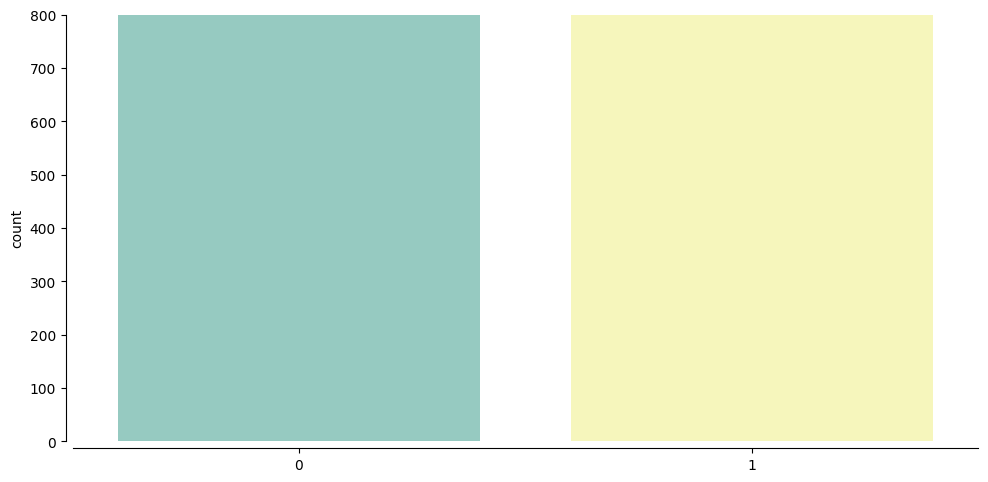

In [101]:
g = sns.catplot(data=df_treinamento
                , x="Sentiment"
                , height=5
                , aspect=2
                , kind="count"
                , palette="Set3"
                , hue="Sentiment"
                , legend=False)
sns.despine(offset=5)

g.set(ylim=(0, 800))
g.set(xlabel=None)

In [104]:
# Pré-processa a coluna de sentenças.
df_treinamento["Preprocessed_Sentence"] = df_treinamento["Sentence"].apply(preprocessa_texto)
df_treinamento.head()

,Sentence,Sentiment,Preprocessed_Sentence
0,Mais um lixo,1,mais um lixo
1,Essa nao tem vergonha na cara!!,1,essa nao tem vergonha na cara
2,Essa mulher é doente.pilantra!,1,essa mulher e doente pilantra
3,Comunista safada...,1,comunista safada
4,Vagabunda. Comunista. Mentirosa. O povo chilen...,1,vagabunda comunista mentirosa povo chileno nao...


In [105]:
# Divide o dataset de trechos de textos em treinamento e teste.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_treinamento["Preprocessed_Sentence"], df_treinamento["Sentiment"], test_size=.25, random_state=32)

In [106]:
# Vetoriza os conjuntos de treinamento.
vetorizador = CountVectorizer(max_features=1000)
X_train_vetorizado = vetorizador.fit_transform(X_train)
X_train_vetorizado = pd.DataFrame(X_train_vetorizado.toarray(), columns=vetorizador.get_feature_names_out())
X_train_vetorizado.index = X_train_vetorizado.index
X_train_vetorizado.head()

,abencoe,abraco,abrir,absurdo,acaba,acabar,acabou,acha,acham,achando,...,volta,voltar,votar,votaram,votei,voto,votou,vou,voz,zambelli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# Vetoriza os conjuntos de testes.
X_test_vetorizado = vetorizador.transform(X_test)
X_test_vetorizado = pd.DataFrame(X_test_vetorizado.toarray(), columns=vetorizador.get_feature_names_out())
X_test_vetorizado.index = X_test_vetorizado.index
X_test_vetorizado.head()

,abencoe,abraco,abrir,absurdo,acaba,acabar,acabou,acha,acham,achando,...,volta,voltar,votar,votaram,votei,voto,votou,vou,voz,zambelli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
# Treina o modelo de classificação de sentimentos.
clf = MultinomialNB()
_ = clf.fit(X_train_vetorizado, y_train)
print(formata_msg("INFO", "Modelo base treinado"))

[INFO] 2025-07-02 11:48:29 - Modelo base treinado


In [109]:
y_pred = clf.predict(X_test_vetorizado)
print(formata_msg("INFO", "Modelo base testado"))

[INFO] 2025-07-02 11:48:43 - Modelo base testado


In [110]:
# Calcula a acurácia do modelo.
acc = accuracy_score(y_pred, y_test)
print(formata_msg("INFO", f"Acurácia: {acc}"))

[INFO] 2025-07-02 11:48:53 - Acurácia: 0.8108571428571428


Text Blob

In [112]:
# Determina a polaridade do texto
texto_1 = df_treinamento.iloc[0]["Sentence"]
texto_2 = df_treinamento.iloc[1]["Sentence"]
texto_3 = df_treinamento.iloc[3580]["Sentence"]

p_1 = TextBlob(texto_1).sentiment.polarity
p_2 = TextBlob(texto_2).sentiment.polarity
p_3 = TextBlob(texto_3).sentiment.polarity
print(formata_msg("INFO",f"\n{p_1}\n{p_2}\n{p_3}"))

[INFO] 2025-07-02 11:56:08 - 
0.0
0.0
0.0


In [114]:
!pip install vaderSentiment


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

texto = 'o cara falou oq todo mundo tem vontade de falar'

# Get sentiment scores
scores = analyzer.polarity_scores(text)

# Output results
print(scores)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [127]:
#frase do cara: sapatao filha da puta, vai tomar no cu" - label = pos = homofobia

# Lista de frases rotuladas
dados = [
    {"frase": "o cara falou oq todo mundo tem vontade de falar", "label": "pos"},
    {"frase": "Onde ele errou?", "label": "pos"},
    {"frase": "todo mundo não... só gente sem noção. Sou lésbica e tô beeeem longe de querer parecer ou ser homem.", "label": "neg"},
    {"frase": "tenho raiva tenho nojo de gente homofóbica e preconceituosa até pq eu tenho dois primos gays e uma prima lésbica na minha família eu jamais faria isso com uma pessoa seja ela lésbica gay trans minha mãe me ensinou a respeitar o próximo", "label": "neg"},
    {"frase": "entaooo", "label": "neu"},
    {"frase": "Apartir do momento que vc falou já deu a entender", "label": "neu"},
]

In [128]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inicializa o analisador
analyzer = SentimentIntensityAnalyzer()

# Função para converter o compound score para rótulo
def obter_label(score):
    if score >= 0.05:
        return "pos"
    elif score <= -0.05:
        return "neg"
    else:
        return "neu"

# Avaliar as frases
resultados = []

for item in dados:
    frase = item["frase"]
    verdadeiro = item["label"]
    scores = analyzer.polarity_scores(frase)
    previsto = obter_label(scores["compound"])
    
    resultados.append({
        "frase": frase,
        "label_real": verdadeiro,
        "label_previsto": previsto
    })


In [129]:
# Avaliação
corretos = sum(1 for r in resultados if r["label_real"] == r["label_previsto"])
total = len(resultados)
acuracia = corretos / total

print(f"Acurácia: {acuracia:.2f}\n")

# Exibir erros
for r in resultados:
    if r["label_real"] != r["label_previsto"]:
        print(f"Erro: '{r['frase']}' - Real: {r['label_real']}, Previsto: {r['label_previsto']}")


Acurácia: 0.33

Erro: 'o cara falou oq todo mundo tem vontade de falar' - Real: pos, Previsto: neu
Erro: 'Onde ele errou?' - Real: pos, Previsto: neu
Erro: 'todo mundo não... só gente sem noção. Sou lésbica e tô beeeem longe de querer parecer ou ser homem.' - Real: neg, Previsto: neu
Erro: 'tenho raiva tenho nojo de gente homofóbica e preconceituosa até pq eu tenho dois primos gays e uma prima lésbica na minha família eu jamais faria isso com uma pessoa seja ela lésbica gay trans minha mãe me ensinou a respeitar o próximo' - Real: neg, Previsto: neu


In [133]:
from transformers import pipeline

# Lista de frases rotuladas manualmente
dados = [
    {"frase": "o cara falou oq todo mundo tem vontade de falar", "label": "pos"},
    {"frase": "Onde ele errou?", "label": "pos"},
    {"frase": "todo mundo não... só gente sem noção. Sou lésbica e tô beeeem longe de querer parecer ou ser homem.", "label": "neg"},
    {"frase": "tenho raiva tenho nojo de gente homofóbica e preconceituosa até pq eu tenho dois primos gays e uma prima lésbica na minha família eu jamais faria isso com uma pessoa seja ela lésbica gay trans minha mãe me ensinou a respeitar o próximo", "label": "neg"},
    {"frase": "entaooo", "label": "neu"},
    {"frase": "Apartir do momento que vc falou já deu a entender", "label": "neu"},
]

# Pipeline de análise de sentimento
sentiment_pipeline = pipeline("sentiment-analysis")

# Extrair textos
textos = [d["frase"] for d in dados]

# Obter predições do modelo
resultados_modelo = sentiment_pipeline(textos)

# Comparar com os rótulos manuais
acertos = 0
total = len(dados)
print("\nResultados:")

for i, resultado in enumerate(resultados_modelo):
    frase = dados[i]["frase"]
    label_real = dados[i]["label"]
    
    label_previsto = resultado["label"].lower()
    # Converter para o formato 'pos', 'neg' ou 'neu' (dependendo do modelo)
    if "positive" in label_previsto:
        label_previsto = "pos"
    elif "negative" in label_previsto:
        label_previsto = "neg"
    else:
        label_previsto = "neu"  # Muitos modelos não retornam neutro, só pos/neg
    
    correto = label_real == label_previsto
    if correto:
        acertos += 1
    
    print(f"- Frase: {frase}\n  Real: {label_real} | Previsto: {label_previsto} | {'✅' if correto else '❌'}\n")

# Mostrar acurácia
print(f"Acurácia: {acertos}/{total} = {acertos / total:.2f}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



Resultados:
- Frase: o cara falou oq todo mundo tem vontade de falar
  Real: pos | Previsto: pos | ✅

- Frase: Onde ele errou?
  Real: pos | Previsto: neg | ❌

- Frase: todo mundo não... só gente sem noção. Sou lésbica e tô beeeem longe de querer parecer ou ser homem.
  Real: neg | Previsto: neg | ✅

- Frase: tenho raiva tenho nojo de gente homofóbica e preconceituosa até pq eu tenho dois primos gays e uma prima lésbica na minha família eu jamais faria isso com uma pessoa seja ela lésbica gay trans minha mãe me ensinou a respeitar o próximo
  Real: neg | Previsto: neg | ✅

- Frase: entaooo
  Real: neu | Previsto: pos | ❌

- Frase: Apartir do momento que vc falou já deu a entender
  Real: neu | Previsto: neg | ❌

Acurácia: 3/6 = 0.50


In [119]:
df_tiktok.head(20)

,id,comment_id,parent_id,nickname,text,create_time,text_normalizado
0,1,7513972838572819205,None,Marcelo Costa,o cara falou oq todo mundo tem vontade de falar,1749483143,o cara falou oq todo mundo tem vontade de falar
1,2,7513973371807449912,7513972838572819205,Lanna Torres,todo mundo não... só gente sem noção. Sou lésb...,1749483271,todo mundo não... só gente sem noção. sou lésb...
2,3,7514630492042986246,7513972838572819205,⋆˚࿔𝙼aria𝜗𝜚˚⋆✂️,entaooo,1749636267,entaooo
3,4,7514652109389939512,7513972838572819205,🌊preto,kkk é só olhar o seu perfil pra entender,1749641305,kkk é só olhar o seu perfil pra entender
4,5,7514681854999675654,7513972838572819205,larissaSouza,mas não é toda lésbica q tem o senso,1749648227,mas não é toda lésbica q tem o senso
5,6,7514721016935170822,7513972838572819205,Juliana do Vale,"A pessoa tem que ser muito infeliz, para se in...",1749657346,"a pessoa tem que ser muito infeliz, para se in..."
6,7,7514736609732920070,7513972838572819205,Lanna Torres,dá pra entender mesmo... que eu gosto de mulhe...,1749660969,dá pra entender mesmo... que eu gosto de mulhe...
7,8,7514775522355266310,7513972838572819205,Lara O'Connell,"SIMMMM, falou tudo",1749670031,"simmmm, falou tudo"
8,9,7514787449350013752,7513972838572819205,🛹𖣂,Tá mais que certa fia,1749672811,tá mais que certa fia
9,10,7514793430301934368,7513972838572819205,𝑆𝑝𝑖𝑑𝑥𝑧 🎭,Apartir do momento que vc falou já deu a entender,1749674206,apartir do momento que vc falou já deu a entender


In [126]:
df_tiktok['text'][17]

'tenho raiva tenho nojo de gente homofóbica e preconceituosa até pq eu tenho dois primos gays e uma prima lésbica na minha família eu jamais faria isso com uma pessoa seja ela lésbica gay trans minha mãe me ensinou a respeitar o próximo'

In [115]:
sentiment = SentimentIntensityAnalyzer()
se_1 = sentiment.polarity_scores(texto_1)
se_2 = sentiment.polarity_scores(texto_2)
se_3 = sentiment.polarity_scores(texto_3)
print(formata_msg("INFO",f"\n{se_1}\n{se_2}\n{se_3}"))

NameError: name 'SentimentIntensityAnalyzer' is not defined

# PIPELINE

## 3. Limpeza dos Dados

Extração do texto bruto dos dados de entrada, removendo informações 
não textuais


### 2.1  Remoção de dados não textuais - CONVERSÃO DE EMOJIS

In [1]:
# !pip install emoji

# Visualizar o banco de dados SQLite - comentários do TikTok
# Requisitos: sqlite3, pandas

import sqlite3
import pandas as pd

# Conecta ao banco de dados SQLite
conn = sqlite3.connect("replais_comentarios_tiktok.db")

# Lê a tabela completa para um DataFrame do pandas
df_tiktok = pd.read_sql_query("SELECT * FROM comentarios", conn)

# Mostra as primeiras linhas
df_tiktok.head()

,id,comment_id,parent_id,nickname,text,create_time
0,1,7513972838572819205,None,Marcelo Costa,o cara falou oq todo mundo tem vontade de falar,1749483143
1,2,7513973371807449912,7513972838572819205,Lanna Torres,todo mundo não... só gente sem noção. Sou lésb...,1749483271
2,3,7514630492042986246,7513972838572819205,⋆˚࿔𝙼aria𝜗𝜚˚⋆✂️,entaooo,1749636267
3,4,7514652109389939512,7513972838572819205,🌊preto,kkk é só olhar o seu perfil pra entender,1749641305
4,5,7514681854999675654,7513972838572819205,larissaSouza,mas não é toda lésbica q tem o senso,1749648227


In [ ]:
# !pip install beautifulsoup4

# # Visualizar o título da página HTML
# import requests
# from bs4 import BeautifulSoup
# page = requests.get(url, params)
# soup = BeautifulSoup(p.content,"html.parser") 
# print(soup.title.get_text().strip())


In [14]:
# Função para calcular a frequência de emojis em uma coluna de texto de um DataFrame
# Requisitos: pandas, emoji, collections

import pandas as pd
import emoji
from collections import Counter

def frequencia_emojis(df, coluna_texto):
    """
    Gera um DataFrame com a frequência dos emojis encontrados em uma coluna de texto de um DataFrame.
    
    Parâmetros:
        df (pd.DataFrame): DataFrame contendo os textos.
        coluna_texto (str): Nome da coluna que contém os textos.

    Retorna:
        pd.DataFrame: DataFrame com colunas ['emoji', 'frequencia', 'nome_emoji'], ordenado pela frequência.
    """

    # Função interna para extrair emojis de um texto
    def extrair_emojis(texto):
        return [item['emoji'] for item in emoji.emoji_list(str(texto))]

    # Extrair todos os emojis e contar frequência
    todos_emojis = df[coluna_texto].apply(extrair_emojis).sum()
    frequencia = Counter(todos_emojis)

    # Criar DataFrame e adicionar nome do emoji
    df_freq = pd.DataFrame(frequencia.items(), columns=['emoji', 'frequencia'])
    df_freq['nome_emoji'] = df_freq['emoji'].map(lambda e: emoji.demojize(e))

    # Ordenar pelos mais frequentes
    df_freq = df_freq.sort_values(by='frequencia', ascending=False).reset_index(drop=True)
    
    return df_freq

In [22]:
#df_tiktok
df_freq_tiktok = frequencia_emojis(df_tiktok, 'text')
df_freq_tiktok.head(20)

,emoji,frequencia,nome_emoji
0,😂,7953,:face_with_tears_of_joy:
1,👏,5016,:clapping_hands:
2,🤣,4341,:rolling_on_the_floor_laughing:
3,😅,608,:grinning_face_with_sweat:
4,👍,515,:thumbs_up:
5,🥰,501,:smiling_face_with_hearts:
6,👏🏻,433,:clapping_hands_light_skin_tone:
7,😁,404,:beaming_face_with_smiling_eyes:
8,😳,353,:flushed_face:
9,😎,236,:smiling_face_with_sunglasses:


In [24]:
df_freq_hateBR_odio = frequencia_emojis(df_hateBR_odio, 'comentario')
df_freq_hateBR_odio.head(20)

,emoji,frequencia,nome_emoji
0,😂,486,:face_with_tears_of_joy:
1,🤮,272,:face_vomiting:
2,🤣,185,:rolling_on_the_floor_laughing:
3,🇧🇷,166,:Brazil:
4,💩,161,:pile_of_poo:
5,👏,145,:clapping_hands:
6,😡,93,:enraged_face:
7,🍊,84,:tangerine:
8,😠,54,:angry_face:
9,😢,41,:crying_face:


In [23]:
df_freq_hateBR_nao_odio = frequencia_emojis(df_hateBR_nao_odio, 'comentario')
df_freq_hateBR_nao_odio.head(20)

,emoji,frequencia,nome_emoji
0,👏,1723,:clapping_hands:
1,🇧🇷,782,:Brazil:
2,❤️,450,:red_heart:
3,😂,234,:face_with_tears_of_joy:
4,😍,222,:smiling_face_with_heart-eyes:
5,🙏,146,:folded_hands:
6,🙌,146,:raising_hands:
7,🤣,86,:rolling_on_the_floor_laughing:
8,❤,77,:red_heart:
9,💚,75,:green_heart:


### 2.2  Correção ortográfica - DÚVIDA AO USAR

In [ ]:
#SpellChecker

# !pip install pyspellchecker
# Requisitos: pyspellchecker 

# from spellchecker import SpellChecker
# sp = SpellChecker(language=‘pt’)
# erros =  sp.unknow([‘bola’, ‘futbol’])
# for palavra in erros:
# print(sp.correction(palavra))


### 2.3  Normalização Unicode - DÚVIDA AO USAR

In [ ]:
# !pip install spacy nltk pandas
# python -m spacy download pt_core_news_sm
# # Se ainda não o fez para NLTK
# python -m nltk.downloader punkt stopwords

1. Atributos de Quantidade
Estes são relativamente simples de calcular.

Contagem de caracteres ou tokens:

Contagem de palavras:

Contagem de sentenças:

Contagem de verbos:

Contagem de frases nominais:

Contagem de substantivos:

Contagem de stopwords:

Contagem de adjetivos:

Contagem de modificadores: (Substantivos e Advérbios - como indicado na nota 2)

In [36]:
#visualizar o banco de dados 

import sqlite3
import pandas as pd

# Conecta ao banco de dados SQLite
conn = sqlite3.connect("replais_comentarios_tiktok.db")

# Lê a tabela completa para um DataFrame do pandas
df_tiktok = pd.read_sql_query("SELECT * FROM comentarios", conn)

# Mostra as primeiras linhas
df_tiktok.head()

,id,comment_id,parent_id,nickname,text,create_time
0,1,7513972838572819205,None,Marcelo Costa,o cara falou oq todo mundo tem vontade de falar,1749483143
1,2,7513973371807449912,7513972838572819205,Lanna Torres,todo mundo não... só gente sem noção. Sou lésb...,1749483271
2,3,7514630492042986246,7513972838572819205,⋆˚࿔𝙼aria𝜗𝜚˚⋆✂️,entaooo,1749636267
3,4,7514652109389939512,7513972838572819205,🌊preto,kkk é só olhar o seu perfil pra entender,1749641305
4,5,7514681854999675654,7513972838572819205,larissaSouza,mas não é toda lésbica q tem o senso,1749648227


In [38]:
import pandas as pd
df_hateBR = pd.read_csv(r'corpora\dados-francielle-vargas\dados_baixados.csv')

In [37]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import spacy
import pandas as pd
import numpy as np # Para lidar com NaN, se houver

# --- Configurações globais (carregar uma vez) ---
# Carregue o modelo SpaCy para português APENAS UMA VEZ
try:
    nlp = spacy.load("pt_core_news_sm")
except OSError:
    print("Modelo 'pt_core_news_sm' não encontrado. Baixando...")
    spacy.cli.download("pt_core_news_sm")
    nlp = spacy.load("pt_core_news_sm")

# Carregue as stopwords do NLTK APENAS UMA VEZ
stop_words_pt = set(stopwords.words('portuguese'))

# --- Função de Análise de Atributos de Quantidade ---
def analyze_quantity_attributes(text):
    """
    Calcula vários atributos de quantidade para um dado texto.

    Args:
        text (str): O texto a ser analisado.

    Returns:
        dict: Um dicionário contendo os atributos calculados.
    """
    if not isinstance(text, str) or not text.strip(): # Verifica se é string e não está vazia ou só com espaços
        # Retorna zeros para textos inválidos ou vazios
        return {
            "Contagem de caracteres": 0,
            "Contagem de palavras": 0,
            "Contagem de sentenças": 0,
            "Contagem de verbos": 0,
            "Contagem de frases nominais": 0,
            "Contagem de substantivos": 0,
            "Contagem de stopwords": 0,
            "Contagem de adjetivos": 0,
            "Contagem de modificadores": 0
        }

    doc = nlp(text)
    # Palavras alfabéticas para contagem de palavras e tokens relevantes
    words_alpha = [token.text for token in doc if token.is_alpha]
    sentences = [sent.text for sent in doc.sents]

    char_count = len(text)
    word_count = len(words_alpha)
    sentence_count = len(sentences)

    verbs = [token.text for token in doc if token.pos_ == "VERB"]
    nouns = [token.text for token in doc if token.pos_ == "NOUN"]
    nominal_phrases = [chunk.text for chunk in doc.noun_chunks]
    adjectives = [token.text for token in doc if token.pos_ == "ADJ"]
    modifiers = [token.text for token in doc if token.pos_ in ["NOUN", "ADV"]]

    words_lower = [word.lower() for word in words_alpha] # Usar palavras alfabéticas em minúsculas para stopwords
    stopwords_count = len([word for word in words_lower if word in stop_words_pt])

    return {
        "Contagem de caracteres": char_count,
        "Contagem de palavras": word_count,
        "Contagem de sentenças": sentence_count,
        "Contagem de verbos": len(verbs),
        "Contagem de frases nominais": len(nominal_phrases),
        "Contagem de substantivos": len(nouns),
        "Contagem de stopwords": stopwords_count,
        "Contagem de adjetivos": len(adjectives),
        "Contagem de modificadores": len(modifiers)
    }

# --- Adicione aqui as outras funções de análise de atributos (Complexidade, Incerteza, etc.) ---
# Elas seguirão o mesmo padrão, recebendo um texto e retornando um dicionário.
# Por exemplo:
# def analyze_complexity_attributes(text):
#     # ... sua lógica ...
#     return {...}

# def analyze_all_attributes(text):
#     """
#     Função wrapper que combina todos os atributos para um único texto.
#     """
#     attrs = {}
#     attrs.update(analyze_quantity_attributes(text))
#     # attrs.update(analyze_complexity_attributes(text)) # Descomente quando tiver as outras funções
#     # attrs.update(analyze_uncertainty_attributes(text))
#     # ... e assim por diante
#     return attrs

In [39]:
# Carregar os bancos de dados reais (ajuste os nomes dos arquivos e separadores se necessário)
try:
    df_hateBR = df_hateBR.copy()  # Evitar problemas de cópia de DataFrame
    df_tiktok = df_tiktok.copy()  # Evitar problemas de cópia de DataFrame
    print(f"df_hateBR carregado: {len(df_hateBR)} linhas.")
    print(f"df_tiktok carregado: {len(df_tiktok)} linhas.")
except FileNotFoundError:
    print("Certifique-se de que 'df_hateBR.csv' e 'df_tiktok.csv' estão no mesmo diretório.")
    exit() # Encerrar se os arquivos não forem encontrados


df_hateBR carregado: 7000 linhas.
df_tiktok carregado: 34129 linhas.


In [40]:
df_tiktok.columns


Index(['id', 'comment_id', 'parent_id', 'nickname', 'text', 'create_time'], dtype='object')

In [42]:
df_hateBR.columns

Index(['id', 'comentario', 'anotator1', 'anotator2', 'anotator3',
       'label_final', 'links_post', 'account_post'],
      dtype='object')

In [43]:

# Renomear colunas de texto para um nome padrão para facilitar a aplicação da função
# Ajuste 'texto' e 'comentario' para os nomes reais das suas colunas de texto
df_hateBR.rename(columns={'comentario': 'text_content'}, inplace=True)
df_tiktok.rename(columns={'text': 'text_content'}, inplace=True)

# Remover linhas onde o conteúdo do texto é nulo ou vazio antes de processar
df_hateBR.dropna(subset=['text_content'], inplace=True)
df_tiktok.dropna(subset=['text_content'], inplace=True)
df_hateBR = df_hateBR[df_hateBR['text_content'].astype(str).str.strip() != '']
df_tiktok = df_tiktok[df_tiktok['text_content'].astype(str).str.strip() != '']
print(f"df_hateBR após limpeza de texto vazio: {len(df_hateBR)} linhas.")
print(f"df_tiktok após limpeza de texto vazio: {len(df_tiktok)} linhas.")

df_hateBR após limpeza de texto vazio: 7000 linhas.
df_tiktok após limpeza de texto vazio: 34129 linhas.


## 3. Pré Processamento

## 4. Engenharia de Característica

## 5. Modelagem

## 6. Avaliação

## 7. Implementação

## 8. Monitoramento e Atualização